In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Buat direktori model kalau belum ada
os.makedirs('model', exist_ok=True)


In [2]:
# Set parameter dasar
img_size = (128, 128)
batch_size = 32

# Preprocessing dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
train_generator = train_datagen.flow_from_directory(
    'dataset_cleaned/training',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'dataset_cleaned/testing',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3420 images belonging to 3 classes.
Found 855 images belonging to 3 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\khens\envs\notesenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 47s 441ms/step - accuracy: 0.9938 - loss: 0.0220 - val_accuracy: 0.9825 - val_loss: 0.0516
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 382ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9953 - val_loss: 0.0109
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.9972 - loss: 0.0074 - val_accuracy: 0.9988 - val_loss: 0.0066
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 40s 378ms/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9965 - val_loss: 0.0134
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - accuracy: 0.9965 - loss: 0.0130 - val_accuracy: 0.9977 - val_loss: 0.0063
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9906 - val_loss: 0.0277
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.9948 - loss: 0.0194 - val_accuracy: 0.9977 - val_loss: 0.0157
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.9996 - loss: 0

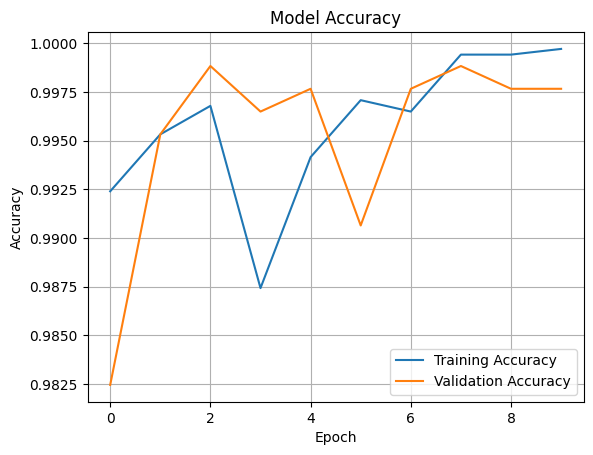

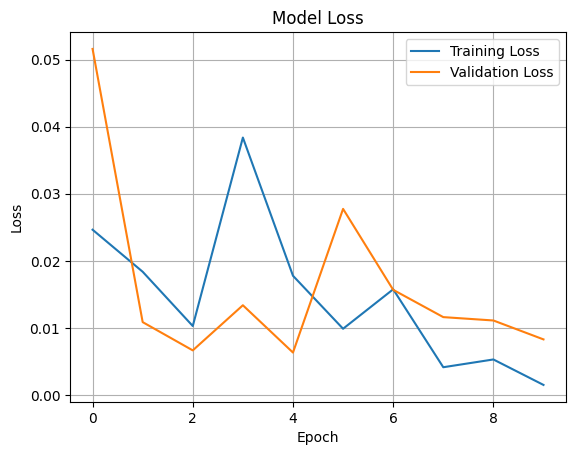

In [9]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [10]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")


✅ Final Training Accuracy: 99.97%
✅ Final Validation Accuracy: 99.77%


In [11]:
model.save('model/model_telur.h5')
print("✅ Model berhasil disimpan di 'model/model_telur.h5'")


✅ Model berhasil disimpan di 'model/model_telur.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


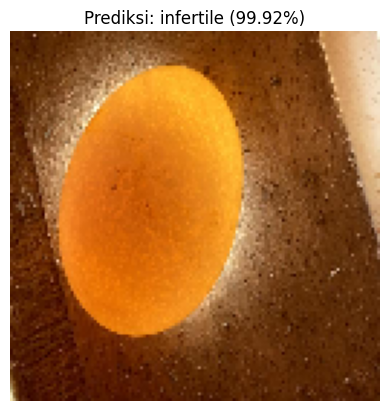

('infertile', np.float32(0.9992086))

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('9_jpg.rf.e62e3247af6ae1642034a8da52f13673.jpg')  # Ganti dengan nama file yang ingin diuji


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


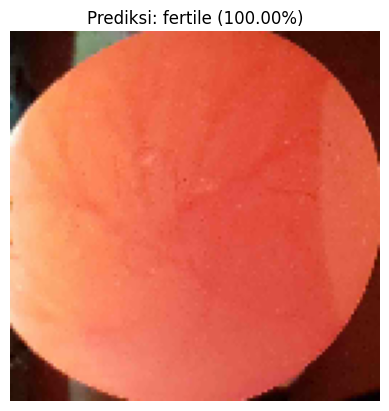

('fertile', np.float32(1.0))

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('fertile.fertile-62.jpg.4gqfj74d.ingestion-5774855475-lq9bd.jpg')  # Ganti dengan nama file yang ingin diuji


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


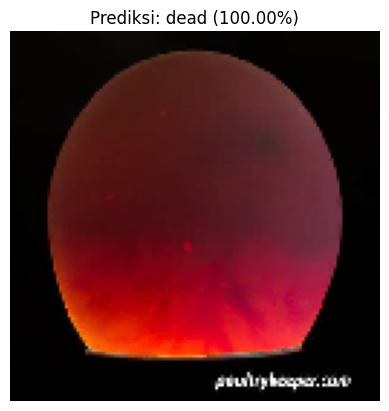

('dead', np.float32(1.0))

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('dead.dead-1.jpg.4gb9gd3d.ingestion-6bf64f87d9-gzjsg.jpg')  # Ganti dengan nama file yang ingin diuji
